# End-to-end Machine Learning project

Notebook contains class notes of ML project and I have also added some notes.


## Problem Statement

Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.

## Dataset

Dataset is based on data from the 1990 California census. It is located at `datasets/housing/housing.csv`

## Jupyter Shortcuts

a - above add

b - below add

x - deleting

shift+enter - running

esc - command mode

In [ ]:
# ============================================================================
# IMPORT ALL REQUIRED LIBRARIES
# ============================================================================

# Data manipulation and analysis
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandas.plotting import scatter_matrix

# Machine Learning - Model Selection & Splitting
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

# Machine Learning - Preprocessing & Transformation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.pipeline import Pipeline, FeatureUnion

# Machine Learning - Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Machine Learning - Metrics
from sklearn.metrics import mean_squared_error

# Additional utilities
from mlxtend.preprocessing import minmax_scaling
from scipy import sparse
import hashlib

# Jupyter notebook display settings
%matplotlib inline

print("✓ All libraries imported successfully!")


# Get the data

In [ ]:
import pandas as pd
import os

HOUSING_PATH = 'datasets/housing/'
def load_housing_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv") 
    return pd.read_csv(csv_path)

In [ ]:
housing = pd.read_csv('datasets/housing/housing.csv')
housing.head()

In [ ]:
housing.head()

In [ ]:
even, odd = 0, 0 
for i in range(6):
    for j in range(6):
        print(i+1, j + 1)
        tot = i + j + 2
        print(tot)
        if tot % 2 == 0:
            even += 1
        else:
            odd += 1
print(even, odd)

In [ ]:
# Q: What is probability that the sum of three of fair dice when rolled is even?
# A: 1 / 2

even, odd = 0, 0 
for k in range(6):
    for i in range(6):
        for j in range(6):
            tot = i + j + k + 3
            # print(tot)
            if tot % 2 == 0:
                even += 1
            else:
                odd += 1
print(even, odd)

## Assignment: Come up with pseudo code for the algorthim:

#Try finding if you can use LLama instead of pseudo code.
# https://github.com/bentoml/OpenLLM ..

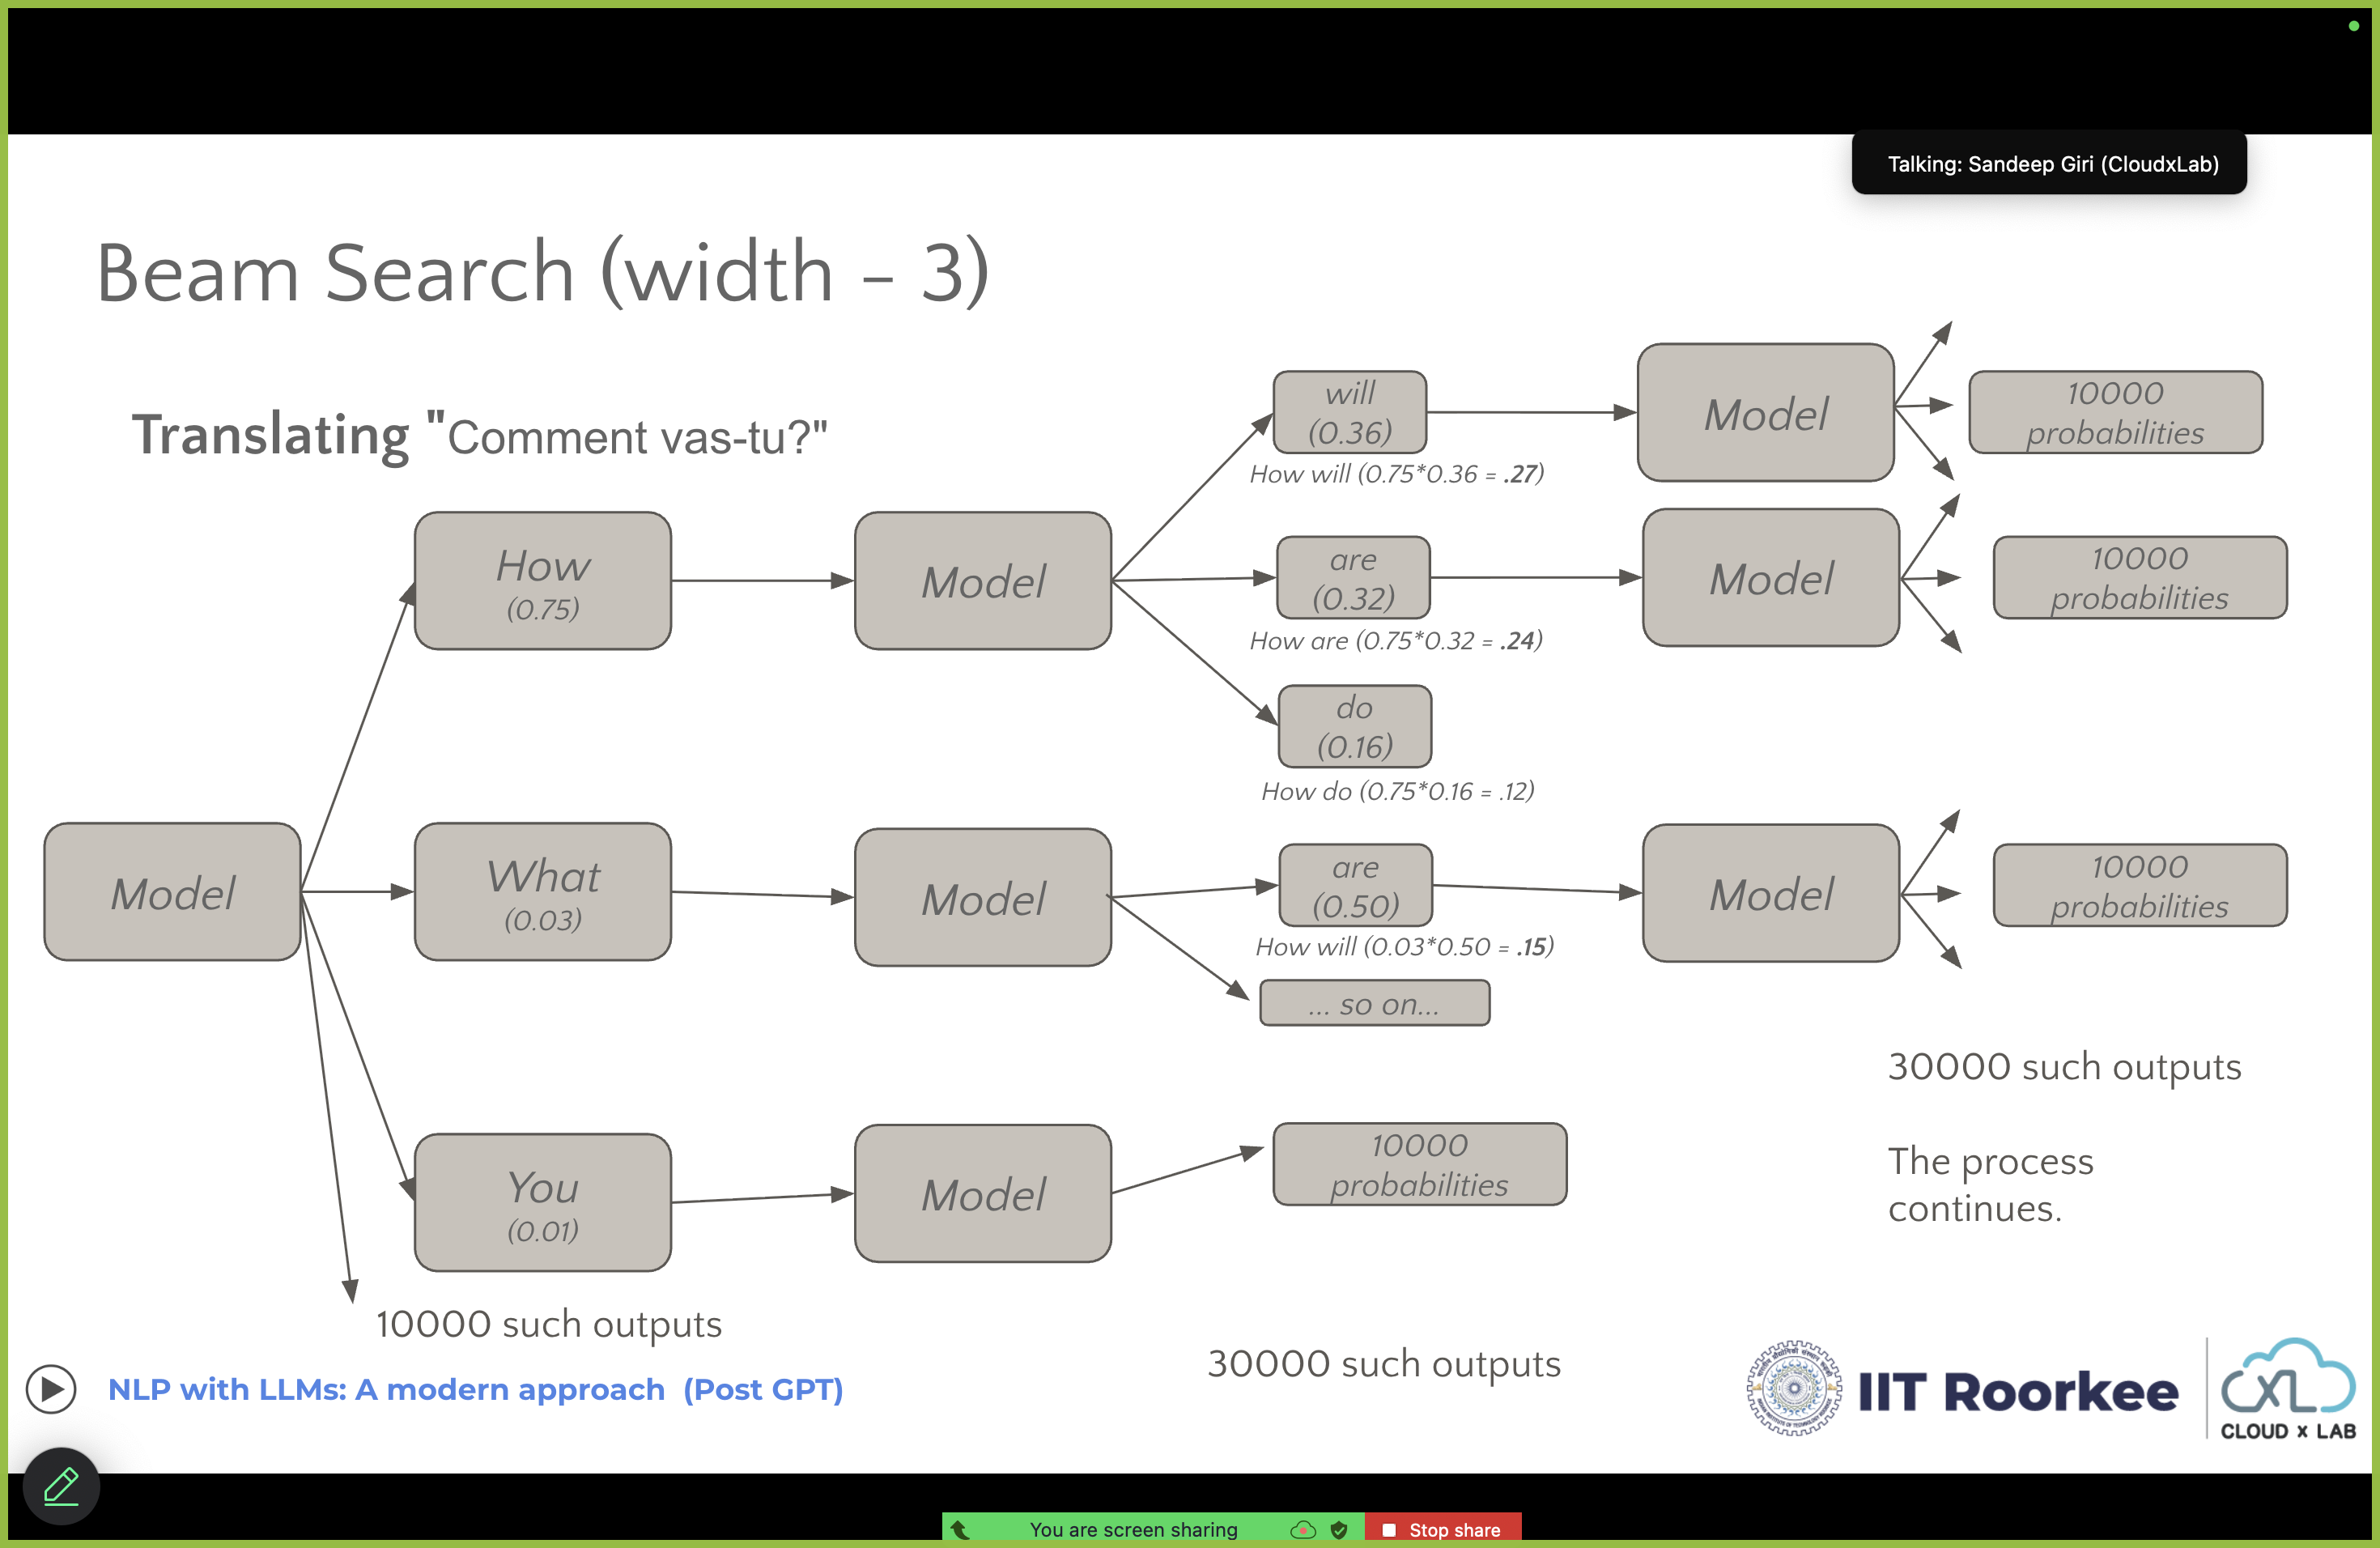

In [ ]:

housing = load_housing_data()
housing.head()

In [ ]:
housing.shape

Each row represents one district. 
There are 10 attributes:
longitude, 
latitude, 
housing_median_age, 
total_rooms, 
total_bedrooms, 
population,
households, 
median_income, 
median_house_value and 
ocean_proximity


In [ ]:
# The info() method is useful to get a quick description of the data
# in particular the total number of rows,
# and each attribute’s type and number of non-null values

housing.info()

There are 20,640 instances in the dataset.

Notice that the total_bedrooms attribute has only 20,433 non null values, meaning that 207 districts are missing this feature.

All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any
kind of Python object, but since you loaded this data from a CSV file you know that it must be a text
attribute. 

When you looked at the top five rows, you probably noticed that the values in that column were
repetitive, which means that it is probably a categorical attribute.

In [ ]:
# Find out what categories exist
# and how many districts belong to each category by using the value_counts() method

housing["ocean_proximity"].value_counts()


In [ ]:
# Let's look at the other fields.
# The describe() method shows a summary of the numerical attributes

housing.describe()

The count, mean, min and max rows are self-explanatory.

Note the count of total_bedrooms is 20,433, not 20,640. It means that null values are ignored

**std** rows shows the standard deviation (which measures how dispersed the values are)

** 25%, 50%, 75% ** shows the corresponding percentiles

** Points to Note**

1. ** 25th percentile is called 1st quartile ** - 25% of the districts have a housing_median_age lower than 18. 
2. ** 50th percentile is called median ** - 50% of the districts have a housing_median_age lower than 29. 
3. ** 75th percentile is called 3rd quartile ** - 75% of the districts have a housing_median_age lower than 37. 

## Go back to slide - Plot histogram

In [ ]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Refer to slide [Things to Note in Histogram]

In [ ]:
# To make this notebook's output identical at every run

import numpy as np

np.random.seed(42)
print(np.random.random())

np.random.seed(42)
print(np.random.rand())

np.random.seed(42)
print(np.random.randn())

print(np.random.randint(100))

In [ ]:
housing.shape

In [ ]:
import numpy as np

## Train-Test Split

### What is `split_train_test()`?
This function divides a dataset into two subsets:
- **Training set** (~80%): Used to train the machine learning model
- **Test set** (~20%): Used to evaluate the model's performance on unseen data

### Why Split Data?

1. **Prevent Overfitting**: A model trained on data it has already seen will give artificially high accuracy. We need fresh data to measure real performance.
2. **Generalization**: We want to know if the model works on new, unseen data (not just memorize the training data).
3. **Fair Evaluation**: Testing on data the model has never seen gives an honest assessment of how well it will perform in production.

### Why Random Indices?

- **Avoid Bias**: If data is sorted (e.g., prices from low to high), a simple sequential split would put all expensive houses in one set and cheap ones in another, creating a biased split.
- **Representative Sampling**: Randomly shuffling ensures both train and test sets have similar distributions of features and values.
- **No Pattern Leakage**: Random selection prevents the model from learning patterns that only exist because of how the data was ordered.

**Example of bad split:**
```
Data sorted by price: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
Sequential split → Train: [100-500], Test: [600-1000]  ❌ Test set biased toward high prices
Random split → Train: [200, 450, 100, 700], Test: [300, 900, 150, 800]  ✓ Balanced distribution
```

## Key Functions: `np.random.permutation()` and `iloc`

### `np.random.permutation(n)`

**What it does:** Returns a randomly shuffled array of indices from 0 to n-1.

**Example:**
```python
import numpy as np
np.random.permutation(5)  # Output: [3, 1, 4, 0, 2] (random order)
```

**Why it's useful in train-test split:**
- Creates random indices instead of sequential ones
- Ensures each shuffle is different (when no seed is set)
- With `random_state` (seed), produces reproducible results

**In our code:**
```python
shuffled_indices = np.random.permutation(len(data))  # Shuffle indices randomly
```

---

### `iloc` (Integer Location)

**What it does:** Selects rows/columns by **integer position** (0-based indexing), not by label.

**Difference from `loc`:**
- `iloc` → uses integer positions: `data.iloc[0]` = first row
- `loc` → uses labels/names: `data.loc['row_name']` = specific row by name

**Examples:**
```python
data.iloc[0]           # First row
data.iloc[0:5]         # Rows 0-4 (first 5 rows)
data.iloc[[0, 2, 4]]   # Select rows at positions 0, 2, 4
data.iloc[train_indices]  # Select multiple rows by index array
```

**In our code:**
```python
return data.iloc[train_indices], data.iloc[test_indices]
# Uses integer positions from shuffled_indices to select rows
```

**Why `iloc` instead of direct indexing:**
- Works with any order of indices (shuffled or not)
- Cleaner syntax for selecting multiple non-consecutive rows
- Returns a new DataFrame/Series without affecting original data


In [ ]:
# For illustration only. Sklearn has train_test_split()

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

In [ ]:
np.random.seed(67)
print(np.random.permutation(4))
print(np.random.permutation(4))
print(np.random.permutation(4))
print(np.random.permutation(4))


In [ ]:
# Off the shelf
from sklearn.model_selection import train_test_split
my_test_data, my_train_data = train_test_split(housing, test_size=.2)

In [ ]:
#Another way to split the data using unique identifier to compute the hash. We will use scikit-learn's hashlib.
# With unique and immutable identifier

import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

print(len(train_set), "train +", len(test_set), "test")

In [ ]:
from hashlib import md5 as hash 
identifier = 10
hash(np.int64(identifier)).digest()


In [ ]:
sum([1*2*3*10*67, 89, 89, 189, 188, 2646, 90])%100

In [ ]:

test_set.head()

In [ ]:
# Combining latitude and longitude into an ID

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

print(len(train_set), "train +", len(test_set), "test")

test_set.head()


In [ ]:
np.random.seed(1)
np.random.permutation(4)

In [ ]:
from sklearn.model_selection import train_test_split

help(train_test_split)

In [ ]:
# With sklearn train_test_split

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(len(train_set), "train +", len(test_set), "test")

test_set.head()

In [ ]:
housing.hist()

In [ ]:
# Create a histrogram of median income

housing["median_income"].hist()

In [ ]:
np.ceil(1.1)

In [ ]:
np.ceil(housing["median_income"]/1.5)

In [ ]:
# Divide by 1.5 to limit the number of income categories
# Round up using ceil to have discrete categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

In [ ]:
housing["income_cat"].value_counts()

In [ ]:

# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [ ]:
housing["income_cat"].value_counts()

In [ ]:
housing["income_cat"].hist()

In [ ]:
# Stratified Sampling using Scikit-learn's StratifiedShuffleSplit Class

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
# Income category proportion in test set generated with stratified sampling
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [ ]:
# Income category proportion in full dataset

housing["income_cat"].value_counts() / len(housing)

In [ ]:
# Let’s compare income category proportion in Stratified Sampling and Random Sampling

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [ ]:
housing = strat_train_set.copy()

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611). Thanks to Wilmer Arellano for pointing it out.

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [ ]:
import matplotlib.image as mpimg
california_img=mpimg.imread('images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [ ]:
corr_matrix = housing.corr()
corr_matrix

In [ ]:
corr_matrix["median_house_value"]

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [ ]:
# Experimenting with Attribute Combinations

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

housing.head(20)

In [ ]:
corr_matrix = housing.corr()
corr_matrix

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [ ]:
housing.describe()

# Prepare the data for Machine Learning algorithms

In [ ]:
# Let’s revert to a clean training set

housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

# Note drop() creates a copy of the data and does not affect strat_train_set

In [ ]:
housing.info()

In [ ]:
isn = housing.isnull()
isn.any(axis=1)

In [ ]:
# Let’s experiment with sample dataset for data cleaning

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head(100)
sample_incomplete_rows

In [ ]:
# Option one
# dropna() - drops the missing values

sample_incomplete_rows.dropna(subset=["total_bedrooms"])

In [ ]:
# Option two
# drop() - drops the attribute

sample_incomplete_rows.drop("total_bedrooms", axis=1)

In [ ]:
# Option three
# fillna() - sets the missing values
# Let’s fill the missing values with the median

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

In [ ]:
# Let's use Scikit-Learn Imputer class to fill missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [ ]:
# Remove the text attribute because median can only be calculated on numerical attributes

housing_num = housing.drop('ocean_proximity', axis=1)

In [ ]:
# Fit the imputer instance to the training data

imputer.fit(housing_num)

In [ ]:
imputer.statistics_

Transform the training set:

In [ ]:
X = imputer.transform(housing_num)
X

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.info()

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [ ]:
# Convert ocean_proximity to numbers

housing_cat = housing['ocean_proximity']
housing_cat.head(10)

In [ ]:
# Pandas factorize() example

df = pd.DataFrame({
        'A':['type1','type3','type3', 'type2', 'type0']
    })
df['A'].factorize()

In [ ]:
# Convert ocean_proximity to numbers
# Use Pandas factorize()


housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

In [ ]:
housing_cat_encoded.reshape(-1,1)

In [ ]:
# Check encoding classes

housing_categories

In [ ]:
# We can convert each categorical value to a one-hot vector using a `OneHotEncoder`
# Note that fit_transform() expects a 2D array
# but housing_cat_encoded is a 1D array, so we need to reshape it

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

In [ ]:
# The OneHotEncoder returns a sparse array by default, but we can convert it to a dense array if needed

housing_cat_1hot.toarray()

In [ ]:
# Just run this cell, or copy it to your code, do not try to understand it (yet).
# Definition of the CategoricalEncoder class, copied from PR #9151.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [ ]:
# The CategoricalEncoder expects a 2D array containing one or more categorical input features. 
# We need to reshape `housing_cat` to a 2D array:

cat_encoder = CategoricalEncoder(encoding="onehot-dense")
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

In [ ]:
cat_encoder.categories_

Let's create a custom transformer to add extra attributes:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

In [ ]:
housing_extra_attribs.describe()

## Go to slide Custom Transformers - Summary

In [ ]:
# Feature Scaling - Min-max Scaling - Example
# Creating DataFrame first

s1 = pd.Series([1, 2, 3, 4, 5, 6], index=(range(6)))
s2 = pd.Series([10, 9, 8, 7, 6, 5], index=(range(6)))
df = pd.DataFrame(s1, columns=['s1'])
df['s2'] = s2
df 


In [ ]:
# Use Scikit-Learn minmax_scaling

from mlxtend.preprocessing import minmax_scaling
minmax_scaling(df, columns=['s1', 's2'])


In [ ]:
# Now let's build a pipeline for preprocessing the numerical attributes:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

And a transformer to just select a subset of the Pandas DataFrame columns:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [ ]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [ ]:
num_pipeline.fit_transform(housing)

In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [ ]:
housing.head()

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared[0])
print(housing_prepared[1])
print(housing_prepared[2])

# Select and train a model 

In [ ]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
# Let's try the full pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Compare against the actual values:

In [ ]:
# Print the actual values

print("Labels:", list(some_labels))

In [ ]:
# Calculate the RMSE in Linear Regression Model

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
# Train a model using Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
# Calculate RMSE in Decision Tree model

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
# Performs K-fold cross-validation
# Randomly splits the training set into 10 distinct subsets called folds
# Then it trains and evaluates the Decision Tree model 10 times By
# Picking a different fold for evaluation every time and training on the other 9 folds
# The result is an array containing the 10 evaluation scores

from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
# Look at the score of cross-validation of DecisionTreeRegressor

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
# Now compute the same score for Linear Regression

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

In [ ]:
# Let's train one more model using Random Forests

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
# Calculate RMSE in Random Forest model

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
# Cross Validation in Random Forest model

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

### Fine-tune the Model

In [ ]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

count = 0;
for i in [3, 10, 30]:
    for j in  [2, 4, 6, 8]:
        print(" I am goin to try %d <> %d" % (i, j) )
        count += 1

for k in [False]:
    for i in [3, 10]:
        for j in  [2, 3, 4]:
            print(" I am goin to try %d <> %d <> %s" % (i, j, k) )
            count += 1
print(count)

In [ ]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 30], 'max_features': [6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [10, 30], 'max_features': [6, 8]},
]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
# The best hyperparameter combinations

grid_search.best_params_

In [ ]:
# Get the best estimator

grid_search.best_estimator_

In [ ]:
# Let's look at the score of each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

### Go to slide Randomized Search

In [ ]:
# RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

### Go to Slide Analyze the Best Models and Their Errors

In [5]:
# See the importance score of each attribute in GridSearchCV

feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

NameError: name 'grid_search' is not defined

### Go to slide Evaluate model on the Test Set

In [ ]:
# Evaluate model on the Test Set

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

Congratulations! You already know quite a lot about Machine Learning. :)